# POLISCI 3

## Week 10 Lecture Notebook 1

Welcome to Week 10!

For the next (and last) few weeks of the class, we'll be learning how to examine relationships between variables in datasets.

So far, we've look at fairly crude tools:
- `table()`, which worked well for two categorical variables (e.g., rich, middle-income, and poor countries) but broke down with continuous data or with more than one category
- `difference_in_means()`, which was limited to looking at differences between two groups

But what about relationships between variables that are inherently continuous, like average lifespans in a country and that country's average income? All the tools we've learned so far have to oversimplify the data to some extent. Let's learn how to do better.

We'll start in this notebook with visualizations of these relationships.

### Look at your data!

One of my strongest beliefs about data analysis is that we must look at our data. Why? Often, patterns are apparent visually that statistics don't make immediately obvious. For example, this data shown in each of these pictures is actually identical on all the common statistics we're going to learn about in the next few weeks:

<img src="same-stats-different-graphs-image-1920x1000.gif">

But looking at it visually, the data is really different in each of these pictures!

Therefore, when dealing with descriptive data about relationships between two variables, I always recommend plotting your data first.

This turns out to be _super_ easy in R!

### This week's data: politicians' perceptions of their constituents

This week's data is from a study I conducted (Broockman and Skovron (2018)) of 3,765 US state legislators' perceptions of constituency opinion on several issues. We compared their perceptions of their constituents with measures of their constituents' _actual_ opinions.

Let's take a look at the data:

In [1]:
data <- read.csv('broockman_skovron.csv')
head(data)

,republican,incumbent,marriage_perception,marriage_opinion,religexempt_perception,religexempt_opinion,gunsbanassault_perception,gunsbanassault_opinion
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,50,69,60,34,70,70
2,1,0,10,48,60,49,10,46
3,1,1,25,53,65,46,NA,58
4,0,0,50,67,30,38,NA,70
5,1,0,25,52,70,44,NA,60
6,0,1,NA,71,NA,35,NA,69


Here is an overview of what the columns in the dataset represent: 

- `republican`: whether the state legislator or state legislative candidate who answered the survey was a Republican (1 = Republican, 0 = Democrat)
- `incumbent`: whether the person who answered the survey was an incumbent representative (i.e., currently holds political office) (1 = already holds office, 0 = just a candidate)
- `marriage_perception`: what percent of the politician's constituents they think support same-sex marriage
- `marriage_opinion`: what percent of the politician's constituents actually support same-sex marriage
- `religexempt_perception`: what percent of the politician's constituents they think support allowing employers to refuse to cover birth control for employees if it violates their religious beliefs
- `religexempt_opinion`: what percent of the politician's constituents actually support allowing employers to refuse to cover birth control for employees if it violates their religious beliefs
- `gunsbanassault_perception`: what percent of the politician's constituents they think support banning assault weapons
- `gunsbanassault_opinion`: what percent of the politician's constituents actually support banning assault weapons

The most common software package for making graphics in R is called `ggplot2`.

`ggplot2` is really powerful and has a lot of complex features. In this class, we'll stick to one of its simplest and most important features: making what's called a scatterplot between two variables. In a scatterplot, every observation gets a single point on a graph so that you can visualize the relationship between two variables.

Before I start making graphs, a bit of jargon:
- the horizontal axis of a graph that runs left to right is called the x-axis
- the vertical axis of a graph that runs from top to bottom is called the y-axis

In `ggplot2`, we make simple scatterplots like this: `qplot(x.axis.var.name, y.axis.var.name, data = dataset.name)`.

**Note for class:** if we want to change the dataset we are looking at, just change what comes after `data =` to give `qplot()` a different dataset. For example, we could write something like:

```
subset.name <- subset(dataset.name, variable.to.subset.on == 1)
qplot(x.axis.var.name, y.axis.var.name, data = subset.name)
```

Let's start by creating a **scatterplot** between `marriage_perception` and `marriage_opinion`.

Warning message:
“Removed 29 rows containing missing values (geom_point).”


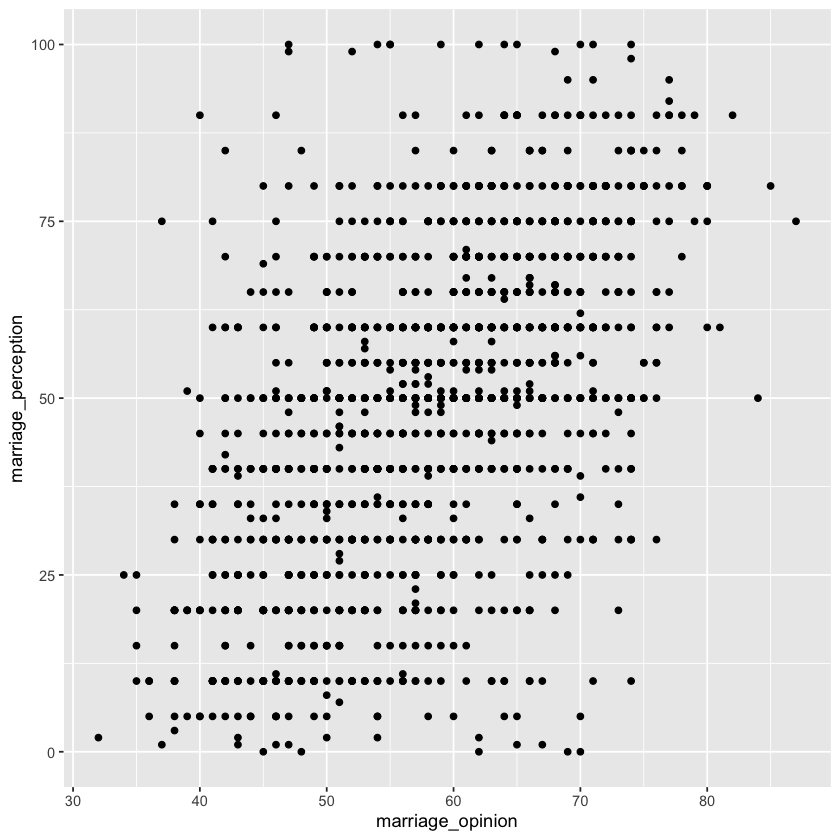

In [2]:
library(ggplot2) # Read in the ggplot2 library. I'll do this at the top of every file.

our.first.plot <- qplot(marriage_opinion, marriage_perception, data = data)
our.first.plot

What a nice-looking plot!

We can already see some pretty interesting things.
- You can see lines of data at intervals of 5 or so. That's because people tend to round to 5 when they name numbers in the 0-100 range.
- It looks like politicians are underestimating support for same-sex marriage.

To understand this second thing, what our eye is trying to do is figure out what the average of the y variable (perception) is at a given level of the x variable (opinion).

We can visualize this too, by adding a **line of best fit**. We do this by adding `+ geom_smooth(method = 'lm')` right after the code to make the main graph, like this:

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 29 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 29 rows containing missing values (geom_point).”


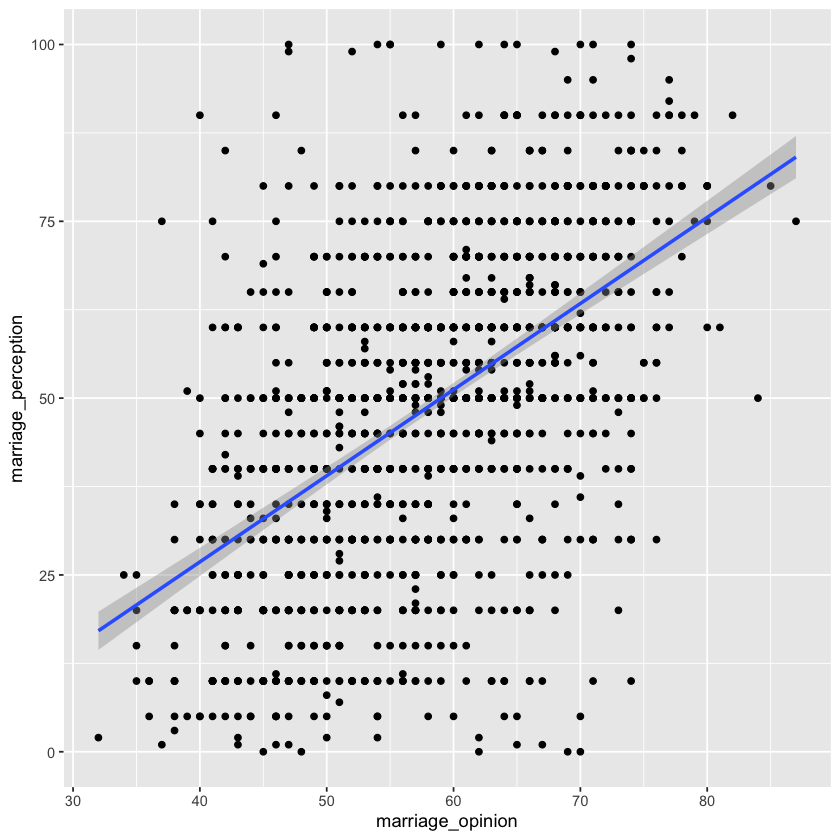

In [3]:
plot.with.lm <- qplot(marriage_opinion, marriage_perception, data = data) + geom_smooth(method = 'lm')
plot.with.lm

**The line of best fit gives us the best guess for the y variable given a value of the x variable.** So, we use the line of best fit to take an x value and then figure out what our best guess for y should be given that value of x.

For example, given marriage opinion is at 60% support, politicians' average guess is at about 50% -- much lower! So what we can now see is that politicians underestimate support for same-sex marriage by about 10 percentage points.

Looking at a graph is a really natural way to see this, and much more powerful than just understanding this with numbers.